In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

In [50]:
start_date = '2001-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='goog_data_large.pkl'

In [51]:
try:
    goog_data = pd.read_pickle(SRC_DATA_FILENAME)
    print('File data found...reading GOOG data')
except FileNotFoundError:     
    print('File not found...downloading the GOOG data')
    goog_data = data.DataReader('GOOG', 'yahoo', start_date,end_date)
    goog_data.to_pickle(SRC_DATA_FILENAME)

File data found...reading GOOG data


In [52]:
goog_monthly_return = goog_data['Adj Close'].pct_change().groupby(
    [goog_data['Adj Close'].index.year,
     goog_data['Adj Close'].index.month]).mean()


In [56]:
t = []

In [62]:
monthly_return_list = []

In [63]:
for i in range(len(goog_monthly_return)):
    temp = {'month':goog_monthly_return.index[i][1],'monthly_return': goog_monthly_return[goog_monthly_return.index[i]]}
    monthly_return_list.append(temp)

In [64]:
monthly_return_list

[{'month': 8, 'monthly_return': 0.0031372241042351146},
 {'month': 9, 'monthly_return': 0.011525105925900978},
 {'month': 10, 'monthly_return': 0.019398660764063894},
 {'month': 11, 'monthly_return': -0.0015536560743837251},
 {'month': 12, 'monthly_return': 0.002801652212515125},
 {'month': 1, 'monthly_return': 0.001142323107347687},
 {'month': 2, 'monthly_return': -0.0017196511082547827},
 {'month': 3, 'monthly_return': -0.0017684136975088729},
 {'month': 4, 'monthly_return': 0.009677071433209611},
 {'month': 5, 'monthly_return': 0.011206862113437212},
 {'month': 6, 'monthly_return': 0.0029135126861058306},
 {'month': 7, 'monthly_return': -0.0009693433190142376},
 {'month': 8, 'monthly_return': -0.000176465321519806},
 {'month': 9, 'monthly_return': 0.004939074564158393},
 {'month': 10, 'monthly_return': 0.008182497896524529},
 {'month': 11, 'monthly_return': 0.0041932602168133475},
 {'month': 12, 'monthly_return': 0.0012390081910123823},
 {'month': 1, 'monthly_return': 0.002642842186

In [66]:
monthly_return = pd.DataFrame(monthly_return_list,columns=['month','monthly_return'])

In [67]:
monthly_return

,month,monthly_return
0,8,0.003137
1,9,0.011525
2,10,0.019399
3,11,-0.001554
4,12,0.002802
...,...,...
156,8,0.000446
157,9,0.001075
158,10,0.002730
159,11,0.000265


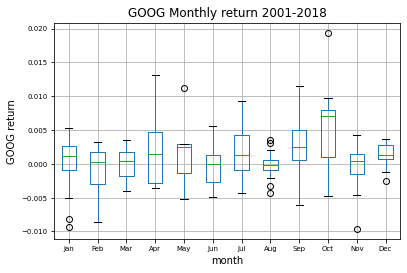

In [71]:
monthly_return.boxplot(column='monthly_return',by='month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('GOOG return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("GOOG Monthly return 2001-2018")
plt.suptitle("")
plt.show()